---
<a name = Section1></a>
# **1. Introduction**
---

This dataset was collected from car sale advertisements for study/practice purposes in 2016.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The goal for this project is to build a Machine Learning models that could predict the price of a second-hand vehicle based on some of its specifications. 

- This model will then be evaluated on how well it predicts the actual prices. 

- This will also help in identifying the variables that directly influence the prices. 

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

This section is emphasised on installing and importing the necessary libraries that will be required.


### **Installing, Upgrading and Importing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling     

In [ ]:
!pip install -q --upgrade pandas-profiling   

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd 
from pandas_profiling import ProfileReport  


pd.set_option('mode.chained_assignment', None)       
pd.set_option('display.max_colwidth', None)          # To display all the data in the columns.
pd.set_option('display.max_columns', None)           # To display all the columns.

import numpy as np                                                  
import matplotlib.pyplot as plt     
                              
import seaborn as sns                                               
%matplotlib inline

import pandas_profiling 
                                 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

np.set_printoptions(precision=4)      # To display values only upto four decimal places. 

import warnings
warnings.filterwarnings('ignore')     # To suppress all the warnings in the notebook.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---
<a name = Section4></a>
# **4. Data Loading & Description**
---

There is existing data set for used cars. This contains following features:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|

### **Data Loading**

In [ ]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN



### **Data Description**


In [ ]:
data.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


**Summary of the various columns in this dataset**

- car: (String Datatype) The company which manufactured the car. It has been noted that this column has high cardinality(87 distinct values).
- price (Int Datatype) The price for which the car was sold. There are 267 rows with the price as zero. 
- body: (String Datatype) The body type of the car sold. Sedan seems to be the maximum occuring value.
- mileage: (Int Datatype) Number of miles that the car has been run for till now. The value in this column could be in thousand multiplers. There were some cars sold with mileage of zero indicating that the dealership sells new vehicles along with old ones. Also the outliers >900 are only 5 in number also there are other value surrounding it which inclines us more to think that these could not be outliers.
- engV: (Float Datatype) The engine volume. There are 434 null values in this column which i am thinking of replacing with the median of the data.
- engType: (String datatype) The fuel type consumed by the engine. This nominal value has only 4 distinct values petrol, gas, diesel and other.
- registration: (boolean Datatype) Just Indicates whether the vehicle was registered or not. Doesn't seem to add much value to the data.
- year: (int Datatype) The year in which the car was sold. Values range from 1953 to 2016.
- model: (String Datatype) The model name under the brand lister as car. We are going to drop this column as well as it has very high cardinality(888 unique values)
- drive: ( String Datatype) Drive type of the vehicle. Only 4 possible values. There are 511 missing values and we are thinking of replacing these values with the mode of the data as this is categorical data.

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

Now we have the dataset loaded and ready to use. We will now start with Exploratory data Analysis whereby we do data pre processing, explore some of the columns and also their relationship with other columns.

### **Data Profile**

In [ ]:
profile = data.profile_report(title="Used Cars' Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile

### **Most preferred engType used over the years**

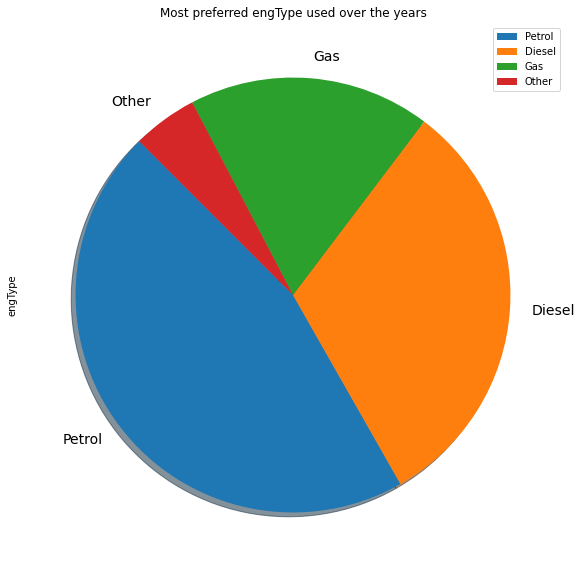

In [ ]:
plt.title("Most preferred engType used over the years")
data.engType.value_counts().plot(kind='pie', fontsize=14, figsize=(10,10), shadow=True, startangle=135, legend=True)
# Most preferred engType used over the years. This shows Petrol is the most preferred car.

### **Top 5 highest price selling car and their models**

In [ ]:
data[data.price.isin(data.price.nlargest())].sort_values(['car','model','body','mileage','price'])
# This shows top 5 highest price selling car and their models details and hence can be used for email marketing for high profile income group peoples to achieve sales goals

,car,price,body,mileage,engV,engType,registration,year,model,drive
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
7914,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full
4325,Mercedes-Benz,300000.0,sedan,68,6.00,Petrol,yes,2011,S 600,NaN


### **Registration w.r.t Years**

,year,registration,RegCounts
0,2008,yes,1150
1,2007,yes,915
2,2012,yes,756
3,2011,yes,691
4,2013,yes,642


Text(0.5, 1.0, 'Years group having max sale/registration')

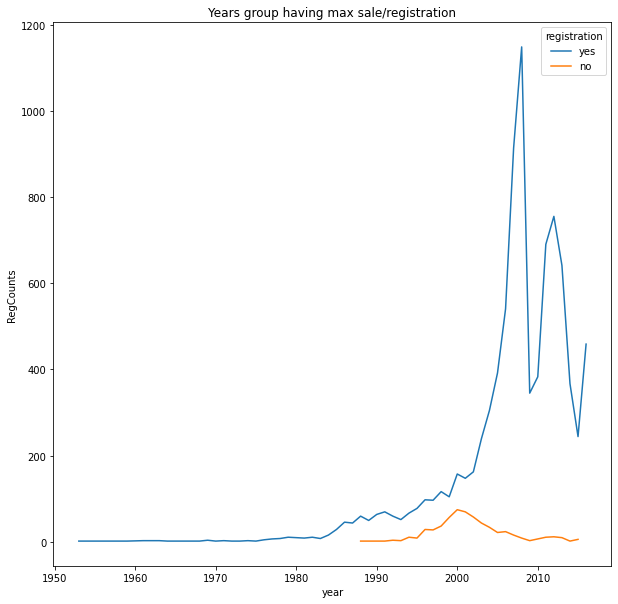

In [ ]:
data.sort_values(['car','model','body','mileage','year'])

df = data.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df = pd.DataFrame(df)
df.rename(columns={'registration': 'RegCounts'}, inplace=True)
df.reset_index(inplace=True)
display(df.head())
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x='year', y='RegCounts', hue='registration')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Years group having max sale/registration")

#This graph shows in which Year was the highest registrations, and hence shows max sale was done in the Year 2008.
#This info can be use to start working/research why sale was max in this year.
#What was the factors affected this sale/registrations

### **The Price distribution over the years**

Text(0.5, 1.0, 'Year - price lineplot (2010 - 2016)')

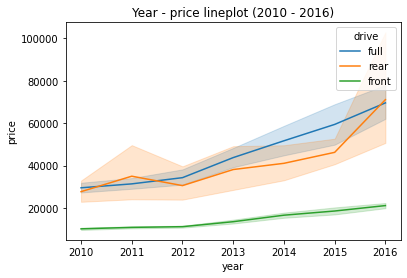

In [ ]:
sns.lineplot(data=data[data.year >= 2010], y='price', x='year', hue='drive')
plt.title("Year - price lineplot (2010 - 2016)")
# As the years increase, we cannot comment on the price increase, but in general, there has been an increase in price in recent years.

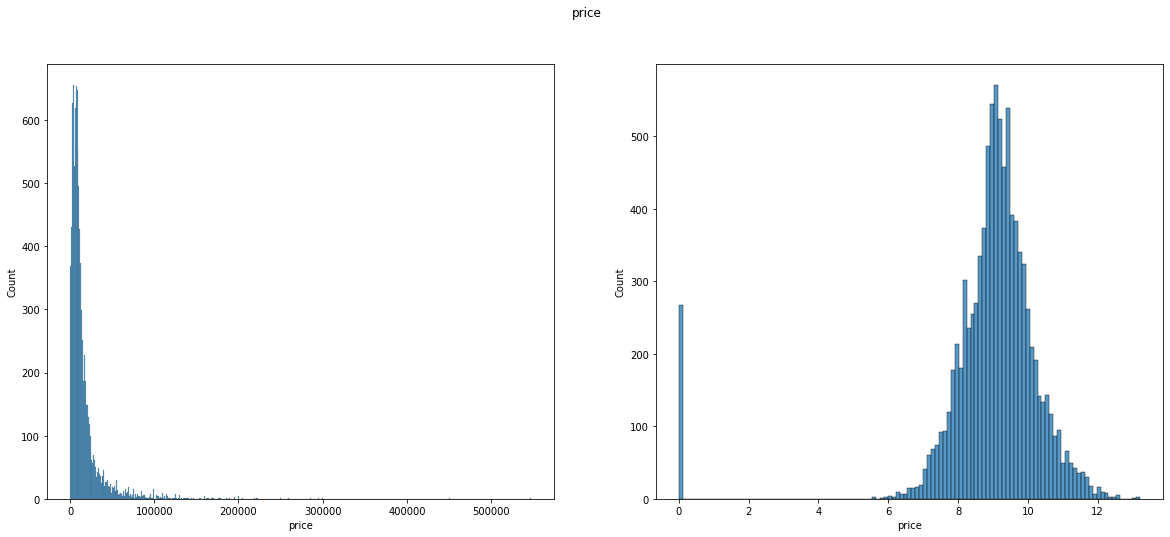

In [ ]:
fig = plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.histplot(data['price'])
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['price']))
fig.suptitle('price', fontsize=12)
plt.show()

### **Price distribution over the year w.r.t to engType**

<Figure size 1440x720 with 0 Axes>

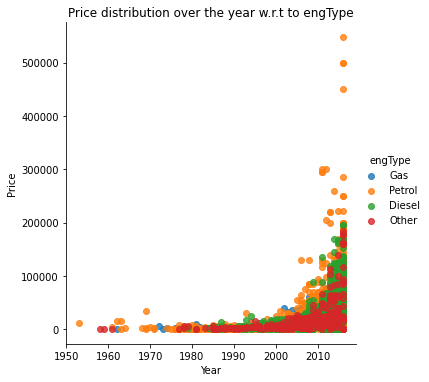

In [ ]:
plt.figure(figsize=(20, 10))
sns.lmplot('year','price', data, fit_reg=False, hue='engType')
plt.title("Price distribution over the year w.r.t to engType")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
# The above multivariate graphs shows the Price distribution over the years w.r.t engType. As the years increase, this shows there is significant increase in prices of cars models having engine type = "Petrol" as compared to "Gas" and "Diesel".
# By this chart we can say that
# Majority of the cars with production year 2008 or later sold in price 50000 or lower.
# All the cars with production year 2010 or later sold in price more than 50000.
# All the cars with production year before 2010 sold in price 50000 or lower.

### **Price distribution over the year w.r.t to mileage**

<Figure size 1440x720 with 0 Axes>

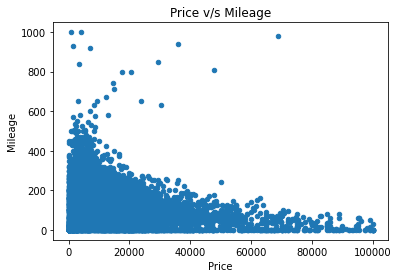

In [ ]:
plt.figure(figsize = (20, 10))
# price v/s mileage 
data[data['price'] < 100000 ].plot.scatter(x='price', y='mileage')
plt.title("Price v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Price');
# By this chart we can say that price and mileage have strogly negative correlation in sold car dataset
# i.e. lower price segment has higher mileage and higher price segment has lower mileage.

### **Heatmap to see correlation amongh different features**

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

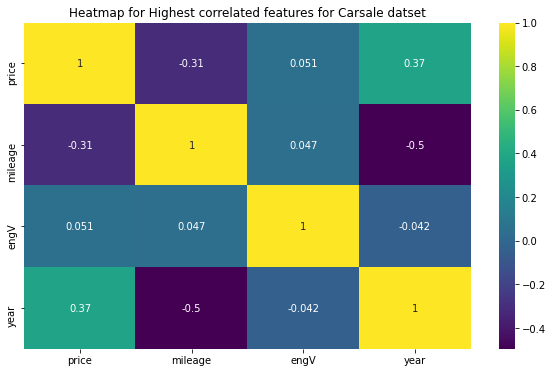

In [ ]:
corr_mat = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap='viridis')
plt.title("Heatmap for Highest correlated features for Carsale datset")

### **PAIR PLOT**

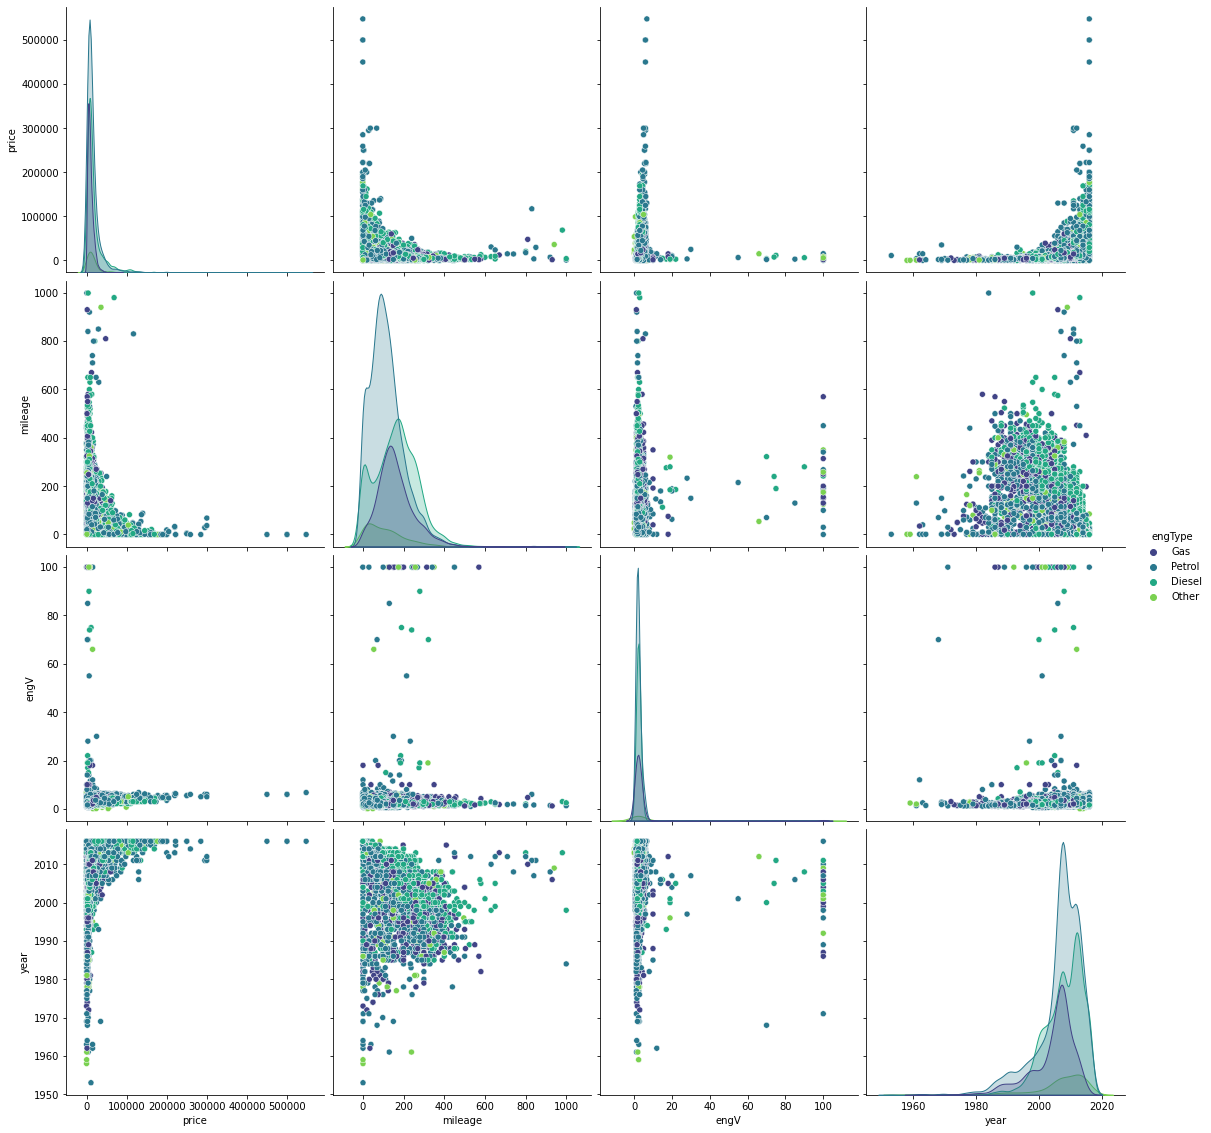

In [ ]:
sns.pairplot(data, hue='engType', palette="viridis", height=4)

### **Conclusion**

- We have observed that lower price segment car has higher mileage and higher price segment car has lower mileage.
- Price and mileage have strogly negative correlation in sold car dataset
- There is significant increase in prices of cars models having engine type "Petrol" as compared to "Gas" and "Diesel".
- Production year 2008 cars are the highest sold cars.
- Majority of the cars with production year 2008 or later sold in price 50000 or lower.
- As the years increase, we cannot comment on the price increase, but in general, there has been an increase in price in recent years.
- Petrol powered cars are sold the maximum.
- Production year has negative correlation with mileage and engine volume.

### **Drop NULL records**


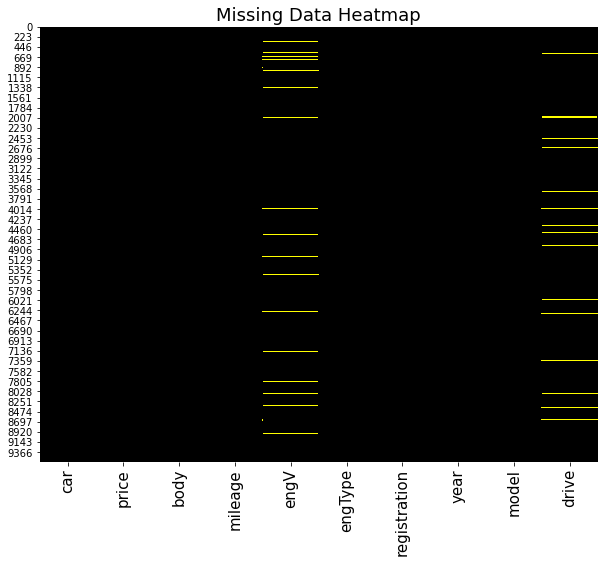

In [ ]:
# Create heatmap to see the missing values
plt.figure(figsize = (10, 8))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(data.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

In [ ]:
data.isnull().sum()
# We have 511 NULL values under the Drive column, and 434 NULL values under the EngineV column

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

### **Drop records with missing data**

In [ ]:
data = data.dropna()
data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

We can also see from the new heatmap that there are no more yellow lines in the heatmap; meaning that all NULL values have indeed been removed.

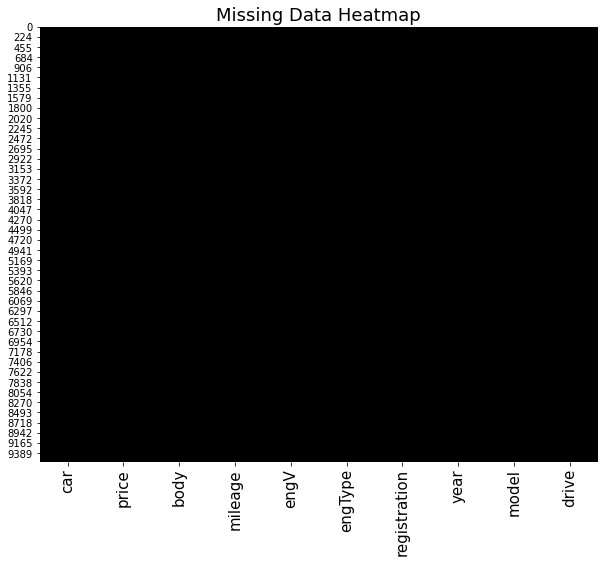

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(data.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

### **Price vs Mileage scatter graph**

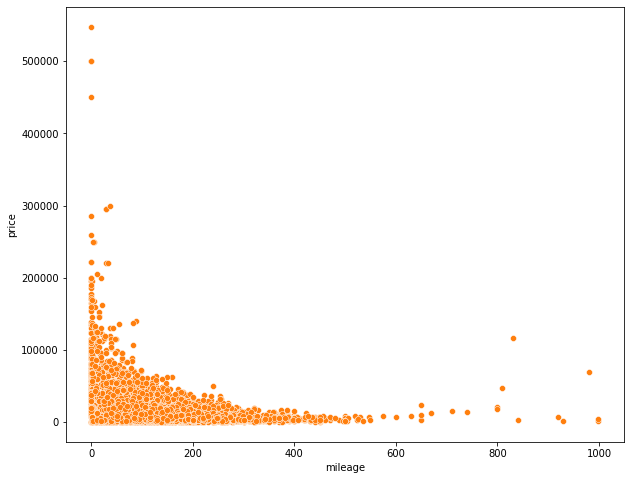

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = data.mileage, y = data.price, color = 'tab:orange')

### **Price vs EngV scatter graph**

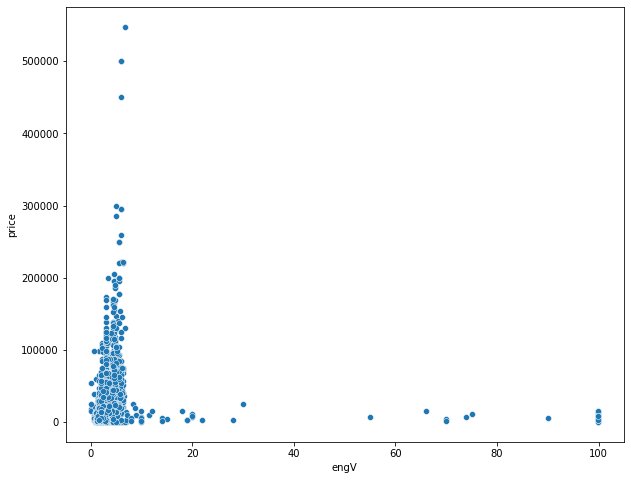

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = data.engV, y = data.price, color = 'tab:blue')

### **Price Transformation**
We can spot patterns in these scatterplots but definitely not linear ones. We cannot run a regression in this case. In order to proceed with the regression, we first need to transform one or more variables. So applied log transformation on Price.

In [ ]:
data['price'] = np.log(data.price)

### **Correcting Inconsistant engV Entries**

In [ ]:
data['engV'].describe()

count    8739.000000
mean        2.588607
std         5.416670
min         0.100000
25%         1.600000
50%         2.000000
75%         2.500000
max        99.990000
Name: engV, dtype: float64

Some engV entries are higher than 10L. Commuter cars typically don't have engine volumes this big. As a comparison, monster trucks have engine volumes of up to 9.42L. The following line of code removes all records over 10L engV.


In [ ]:
data = data[data.engV < 10]

All engV entries have now been corrected. We no longer have "99.99" values, and all values are now under 10.

In [ ]:
data['engV'].describe()

count    8690.000000
mean        2.255415
std         0.988150
min         0.100000
25%         1.600000
50%         2.000000
75%         2.500000
max         9.000000
Name: engV, dtype: float64

### **Dealing with Outliers**

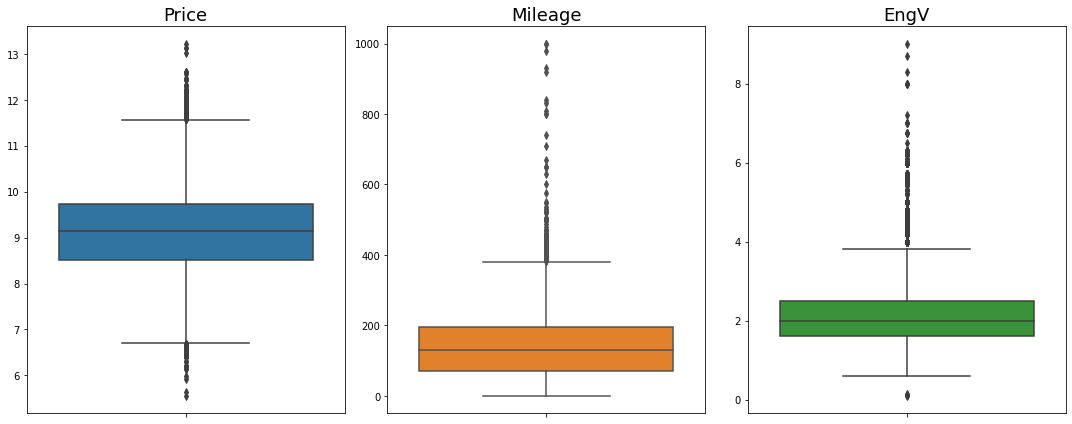

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data.price, ax = ax1, color = 'tab:blue')
ax1.set_title('Price', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data.mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data.engV, ax = ax3, color = 'tab:green')
ax3.set_title('EngV', fontsize = 18)
ax3.set_ylabel(None)
plt.show()

The box plots above help us visualize the range of the outliers. What these plots don't tell us is how many outliers there are. The following lines of code counts the total number of outliers in each of the three variables.

In [ ]:
df = data[['price','mileage','engV']]
q3, q1 = df.quantile(0.75), df.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((df < minm) | (df > (maxm))).sum())

price      400
mileage    150
engV       686
dtype: int64


### **Removing the Outliers**

The following line of code removes these outliers from the dataset. It uses the same minm and maxm variables from before, with minm = q1 - 1.5 iqr and maxm = q3 + 1.5 iqr

In [ ]:
data = data[~((data < minm) | (data > maxm)).any(axis=1)]

df = data[['price','mileage','engV']]
print(((df < minm) | (df > (maxm))).sum())

price      0
mileage    0
engV       0
dtype: int64


All outliers are gone as expected! Let's generate the new boxplots to see the difference.

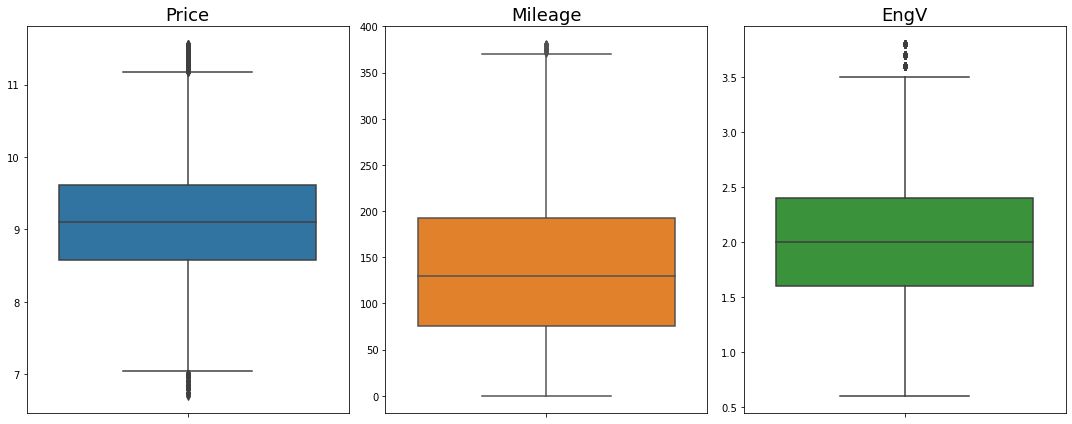

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data.price, ax = ax1, color = 'tab:blue')
ax1.set_title('Price', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data.mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data.engV, ax = ax3, color = 'tab:green')
ax3.set_title('EngV', fontsize = 18)
ax3.set_ylabel(None)
plt.show()

### **Feature Scaling**

In [ ]:
data[['mileage','engV']].describe()

,mileage,engV
count,7591.000000,7591.000000
mean,137.940061,2.020711
std,85.167721,0.610934
min,0.000000,0.600000
25%,75.000000,1.600000
50%,130.000000,2.000000
75%,193.000000,2.400000
max,381.000000,3.800000


Most of the Mileage values are in the hundreds, while the engV values are between 0 and 3.8. In order for our regression to treat these two features equally, we need to transform our data into a standard scale. Here I used the StandardScaler module from sklearn to do the standardization.

In [ ]:
scaler = StandardScaler()
x = data[['mileage','engV']]
scaler.fit(x)
x_scaled = scaler.transform(x)

data[['mileage','engV']] = x_scaled

pd.set_option('display.float_format', '{:.3f}'.format)
data[['mileage','engV']].describe()


,mileage,engV
count,7591.000,7591.000
mean,0.000,0.000
std,1.000,1.000
min,-1.620,-2.326
25%,-0.739,-0.689
50%,-0.093,-0.034
75%,0.647,0.621
max,2.854,2.913


---
<a name = Section6></a>
# **6. Generating Dummy Variables**
---

Let's take a look at all our categorical data: Brand, Body, Engine Type, Registration, and Model.

In [ ]:
data.describe(exclude = [np.number])

,car,body,engType,registration,model,drive
count,7591,7591,7591,7591,7591,7591
unique,75,6,4,2,744,3
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,799,2961,3498,7132,162,4753


We see that there are 293 unique entries under Model. We'll drop this column from our dataset

In [ ]:
data = data.drop('model', axis = 1)

### **Creating the Dummy Variables with get_dummies**

In [ ]:
data = pd.get_dummies(data, drop_first = True)
data.head(10)

,price,mileage,engV,year,car_Alfa Romeo,car_Aro,car_Audi,car_BMW,car_BYD,car_Bogdan,car_Buick,car_Chery,car_Chevrolet,car_Chrysler,car_Citroen,car_Dacia,car_Dadi,car_Daewoo,car_Daihatsu,car_Dodge,car_FAW,car_Fiat,car_Ford,car_GAZ,car_GMC,car_Geely,car_Great Wall,car_Groz,car_Hafei,car_Honda,car_Huanghai,car_Hummer,car_Hyundai,car_Infiniti,car_Isuzu,car_JAC,car_Jaguar,car_Jeep,car_Kia,car_Lancia,car_Land Rover,car_Lexus,car_Lifan,car_Lincoln,car_MG,car_MINI,car_Mazda,car_Mercedes-Benz,car_Mitsubishi,car_Moskvich-AZLK,car_Moskvich-Izh,car_Nissan,car_Opel,car_Peugeot,car_Porsche,car_Renault,car_Rover,car_SMA,car_Saab,car_Samand,car_Samsung,car_Seat,car_Skoda,car_Smart,car_SsangYong,car_Subaru,car_Suzuki,car_TATA,car_Tesla,car_Toyota,car_UAZ,car_VAZ,car_Volkswagen,car_Volvo,car_Wartburg,car_ZAZ,car_ZX,car_ËUAZ,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
0,9.649,-0.821,0.785,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,9.928,0.412,-0.361,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,9.787,0.283,-0.361,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,9.717,-0.645,-0.034,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
6,8.780,0.717,-0.034,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
7,9.259,0.553,-0.852,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,9.976,0.095,-0.361,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
9,10.030,-0.152,0.293,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
10,9.926,-1.620,-1.343,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
11,9.923,0.611,-0.361,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1


### **Distribution of Numerical Data**

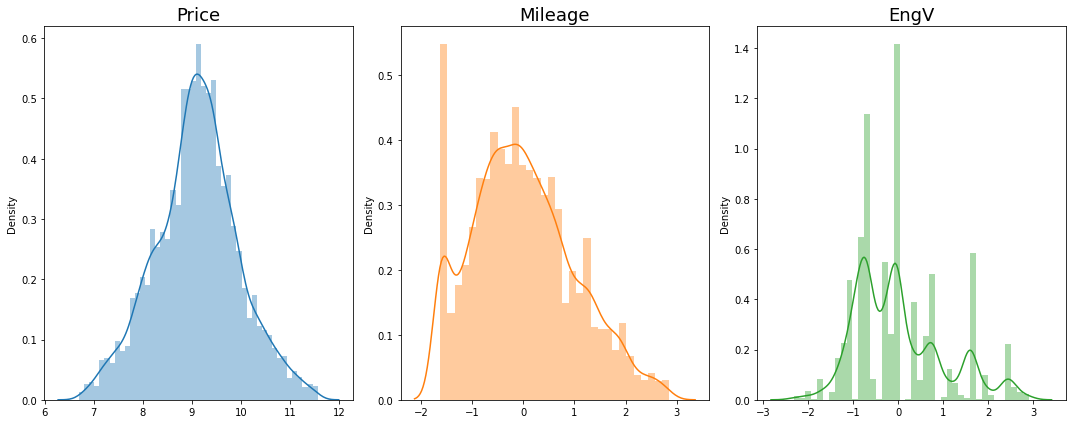

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.distplot(data.price, ax = ax1, color = 'tab:blue')
ax1.set_title('Price', fontsize = 18)
ax1.set_xlabel(None)
sns.distplot(data.mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_xlabel(None)
sns.distplot(data.engV, ax = ax3, color = 'tab:green')
ax3.set_title('EngV', fontsize = 18)
ax3.set_xlabel(None)
plt.show()

---
<a name = Section7></a>
# **7. Data Preparation for ML**
---

### **Declaring the Target and the Predictors**



In [ ]:
y = data['price']
x = data.drop('price', axis =1)

### **Train-Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

---
<a name = Section8></a>
# **8. Linear Regression**
---

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train) 
y_pred_train_lg=linreg.predict(x_train)
y_pred_test_lg=linreg.predict(x_test)

### **Plotting the model**

Text(0, 0.5, 'Predicted')

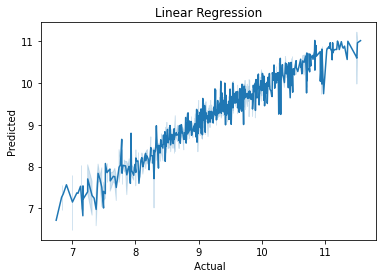

In [ ]:
sns.lineplot(x=y_test, y=y_pred_test_lg)
plt.title('Linear Regression')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

### **Finding R-squared and Adjusted R-squared**

In [ ]:
RMSE_train_lg=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lg))
print('RMSE Train:',RMSE_train_lg)
RMSE_test_lg=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lg))
print('RMSE Test:',RMSE_test_lg)

r2_train_lg=r2_score(y_train, y_pred_train_lg)
print('R-square Train:', r2_train_lg)
r2_test_lg=r2_score(y_test, y_pred_test_lg)
print('R-square Test:', r2_test_lg)

N = len(x_train)
adj_r2_train=(1-(((1-r2_train_lg)*(N-1))/(N-6)))
print('Adjusted R-square Train:', adj_r2_train)
adj_r2_test=(1-(((1-r2_test_lg)*(N-1))/(N-6)))
print('Adjusted R-square Test:', adj_r2_test)

MAE = mean_absolute_error(y_train, y_pred_train_lg)
print('MAE Train:', MAE)
MAE = mean_absolute_error(y_test, y_pred_test_lg)
print('MAE Test:', MAE)



RMSE Train: 0.2808496594218659
RMSE Test: 0.30120049529392445
R-square Train: 0.8914856814976345
R-square Test: 0.8721622620335747
Adjusted R-square Train: 0.8913962367906593
Adjusted R-square Test: 0.872056889681146
MAE Train: 0.19931570183490702
MAE Test: 0.20699226525039047


### **Summary of Linear Regression**


The summary of the Linear Regression Model we have the test dataset.

|Model Name||RMSE Score Train||RMSE Score test||R-square Value train|| R-square value test||Adjusted R-squared Train||Adjusted R-squared test||MAE train||MAE test|
|---------||------------||-------------||----------||-------------||-------||------||------||------|
|Linear Regression Model||0.2808||0.3012||0.8914||0.8721||0.8913||0.8720||0.1993||0.2069|


---
<a name = Section9></a>
# **9. Decision Tree**
---

In [ ]:
model = DecisionTreeRegressor(criterion='mse')
model.fit(x_train, y_train)
y_pred_train_dt=model.predict(x_train)
y_pred_test_dt=model.predict(x_test)

### **Plotting the model**

Text(0, 0.5, 'Predicted')

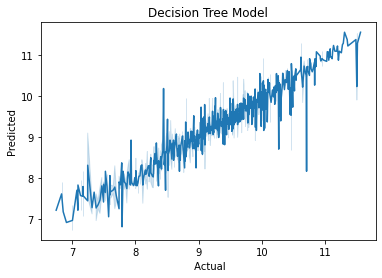

In [ ]:
sns.lineplot(x=y_test, y=y_pred_test_dt)
plt.title('Decision Tree Model')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

### **Finding R-squared and Adjusted R-squared**

In [ ]:
RMSE_train_dt=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_dt))
print('RMSE Train:',RMSE_train_dt)
RMSE_test_dt=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_dt))
print('RMSE Test:',RMSE_test_dt)

r2_train_dt=r2_score(y_train, y_pred_train_dt)
print('R-square Train:', r2_train_dt)
r2_test_dt=r2_score(y_test, y_pred_test_dt)
print('R-square Test:', r2_test_dt)

N = len(x_train)
adj_r2_train=(1-(((1-r2_train_dt)*(N-1))/(N-6)))
print('Adjusted R-square Train:', adj_r2_train)
adj_r2_test=(1-(((1-r2_test_dt)*(N-1))/(N-6)))
print('Adjusted R-square Test:', adj_r2_test)

MAE = mean_absolute_error(y_train, y_pred_train_dt)
print('MAE Train:', MAE)
MAE = mean_absolute_error(y_test, y_pred_test_dt)
print('MAE Test:', MAE)

RMSE Train: 0.025104430616718347
RMSE Test: 0.33063757044068
R-square Train: 0.9991329582790162
R-square Test: 0.8459534004370413
Adjusted R-square Train: 0.9991322436056557
Adjusted R-square Test: 0.8458264250005403
MAE Train: 0.003149826879778216
MAE Test: 0.22449971518641884


### **Decision Tree GridSearchCV Model**

Let us use the powerful python tool called GridSearchCV and develop next model of our Decision Tree. In this model we will let the system iterate over different criteria and give us the best model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_regressor= DecisionTreeRegressor(random_state = 0)

max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = [{'max_depth': max_depth,
              'splitter' : ["best", "random"],
              'max_features': ["auto", "log2"] }]
                            
                            
grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24

In [ ]:
model_dt_grid = grid_search.best_estimator_
y_pred_train_dtg = model_dt_grid.predict(x_train)
y_pred_test_dtg = model_dt_grid.predict(x_test)

### **Plot the model**

Text(0, 0.5, 'Predicted')

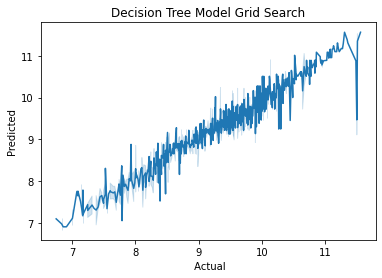

In [ ]:
sns.lineplot(x=y_test, y=y_pred_test_dtg)
plt.title('Decision Tree Model Grid Search')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

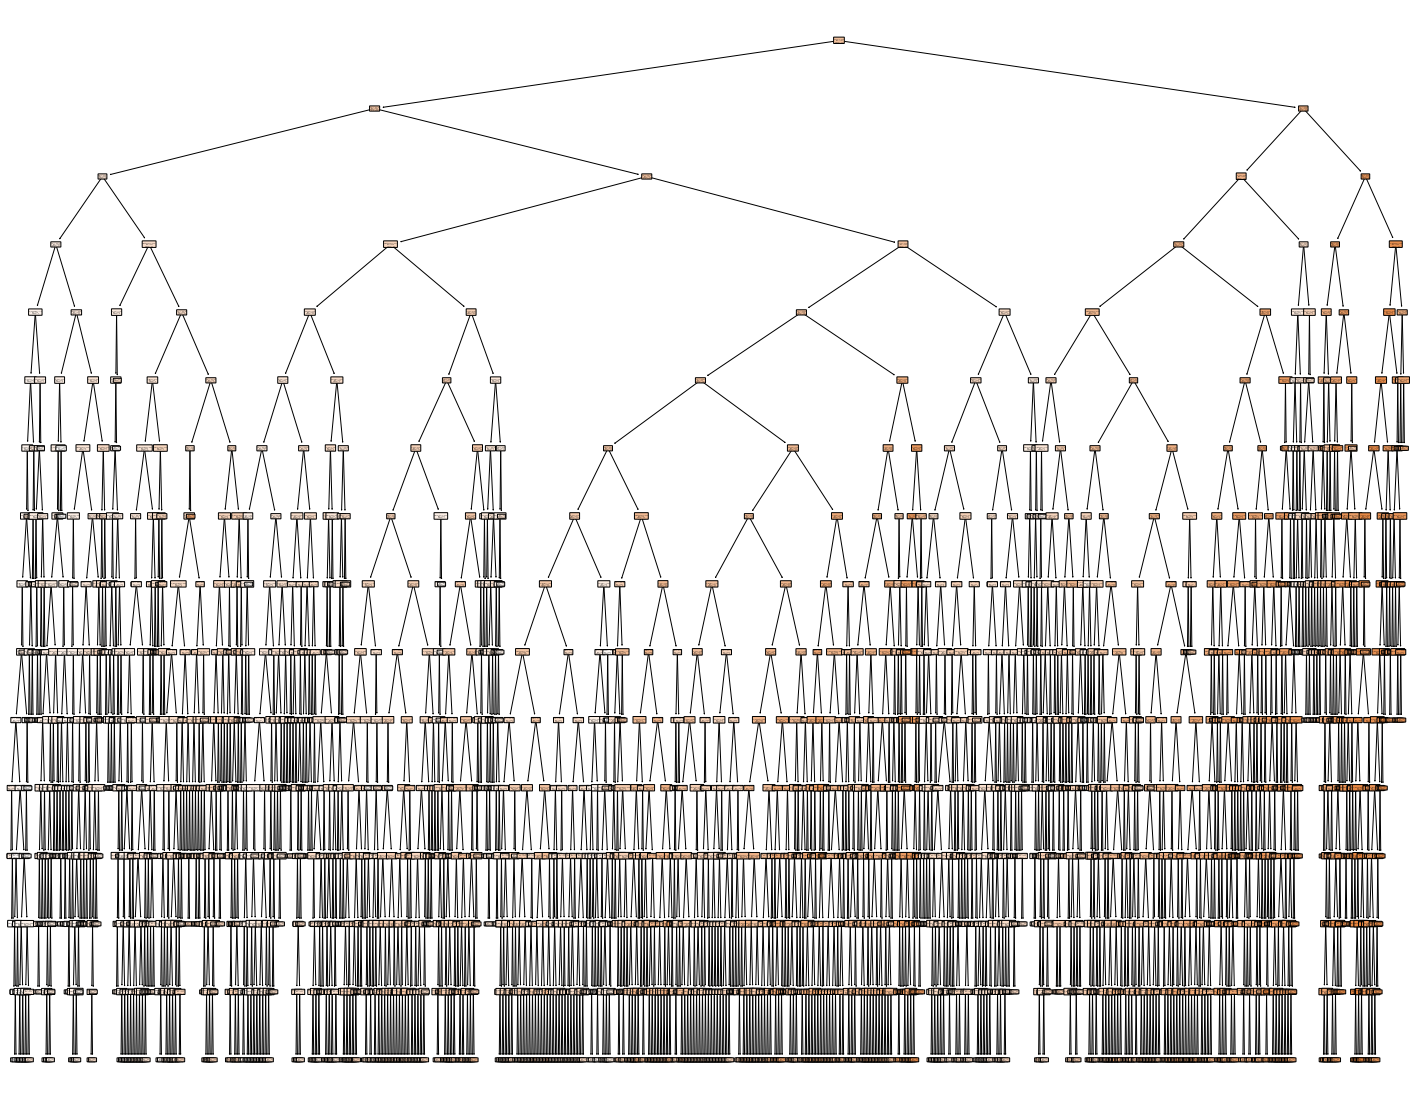

In [ ]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model_dt_grid, feature_names=x.columns, filled=True, rounded=True)

### **Finding R-squared and Adjusted R-squared**

In [ ]:
RMSE_train_dtg=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_dtg))
print('RMSE Train:',RMSE_train_dtg)
RMSE_test_dtg=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_dtg))
print('RMSE Test:',RMSE_test_dtg)

r2_train_dtg=r2_score(y_train, y_pred_train_dtg)
print('R-square Train:', r2_train_dtg)
r2_test_dtg=r2_score(y_test, y_pred_test_dtg)
print('R-square Test:', r2_test_dtg)

N = len(x_train)
adj_r2_train=(1-(((1-r2_train_dtg)*(N-1))/(N-6)))
print('Adjusted R-square Train:', adj_r2_train)
adj_r2_test=(1-(((1-r2_test_dtg)*(N-1))/(N-6)))
print('Adjusted R-square Test:', adj_r2_test)

MAE = mean_absolute_error(y_train, y_pred_train_dtg)
print('MAE Train:', MAE)
MAE = mean_absolute_error(y_test, y_pred_test_dtg)
print('MAE Test:', MAE)

RMSE Train: 0.18553081332847207
RMSE Test: 0.297286303260581
R-square Train: 0.9526444002724673
R-square Test: 0.8754632536234587
Adjusted R-square Train: 0.9526053666426226
Adjusted R-square Test: 0.8753606021674938
MAE Train: 0.11894710267023027
MAE Test: 0.20929815797379955


### **Summary Decision Tree**

The summary of the 2 Decision Tress Models we have the test dataset.

|Model Name||RMSE Score Train||RMSE Score test||R-square Value train|| R-square value test||Adjusted R-squared Train||Adjusted R-squared test||MAE train||MAE test|
|---------||------------||-------------||----------||-------------||-------||------||------||------|
|Decision Tree Model||0.0025||0.3306||0.9991||0.8459||0.9991||0.8458||0.0031||0.2244|
|DecisionTreeSearchCV Model||0.1855||0.2972||0.9526||0.8754||0.9526||0.8753||0.1189||0.2092|

---
<a name = Section10></a>
# **10. Random Forest**
---

In [ ]:
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_train_rf = model_rf.predict(x_train)
y_pred_test_rf = model_rf.predict(x_test)

### **Plot the model**

Text(0, 0.5, 'Predicted')

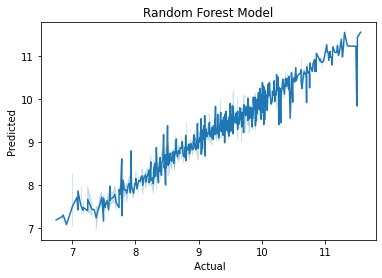

In [ ]:
sns.lineplot(x=y_test, y=y_pred_test_rf)
plt.title('Random Forest Model')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

### **Finding R-squared and Adjusted R-squared**

In [ ]:
RMSE_train_rf=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rf))
print('RMSE Train:',RMSE_train_rf)
RMSE_test_rf=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rf))
print('RMSE Test:',RMSE_test_rf)

r2_train_rf=r2_score(y_train, y_pred_train_rf)
print('R-square Train:', r2_train_rf)
r2_test_rf=r2_score(y_test, y_pred_test_rf)
print('R-square Test:', r2_test_rf)

N = len(x_train)
adj_r2_train=(1-(((1-r2_train_rf)*(N-1))/(N-6)))
print('Adjusted R-square Train:', adj_r2_train)
adj_r2_test=(1-(((1-r2_test_rf)*(N-1))/(N-6)))
print('Adjusted R-square Test:', adj_r2_test)

MAE = mean_absolute_error(y_train, y_pred_train_rf)
print('MAE Train:', MAE)
MAE = mean_absolute_error(y_test, y_pred_test_rf)
print('MAE Test:', MAE)

RMSE Train: 0.0956537136917171
RMSE Test: 0.24510241574850058
R-square Train: 0.9874124005165267
R-square Test: 0.9153468939910229
Adjusted R-square Train: 0.9874020249811792
Adjusted R-square Test: 0.9152771172798384
MAE Train: 0.06370866601339881
MAE Test: 0.17135674691117206


### **Random Forest GridSearchCV Model**

Lets use the most popular python search module called RandomizedSearchCV to iterate over all possible parameters and give us the best model there is for the dataset

In [ ]:
max_depth = list(range(2, 60))
max_depth.append('None')

# specify parameters and distributions to sample from
param_dist = {"max_depth": max_depth,
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ["auto", "log2"]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [ ]:
random_search.fit(x_train, y_train)
model_rfg = random_search.best_estimator_

In [ ]:
y_pred_test_rfg = model_rfg.predict(x_test)
y_pred_train_rfg = model_rfg.predict(x_train)

### **Plot the model**

Text(0, 0.5, 'Predicted')

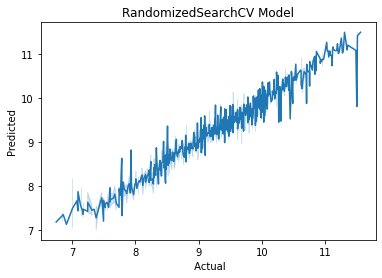

In [ ]:
sns.lineplot(x=y_test, y=y_pred_test_rfg)
plt.title('RandomizedSearchCV Model')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

### **Finding R-squared and Adjusted R-squared**

In [ ]:
RMSE_train_rfg=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rfg))
print('RMSE Train:',RMSE_train_rfg)
RMSE_test_rfg=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rfg))
print('RMSE Test:',RMSE_test_rfg)

r2_train_rfg=r2_score(y_train, y_pred_train_rfg)
print('R-square Train:', r2_train_rfg)
r2_test_rfg=r2_score(y_test, y_pred_test_rfg)
print('R-square Test:', r2_test_rfg)

N = len(x_train)
adj_r2_train=(1-(((1-r2_train_rfg)*(N-1))/(N-6)))
print('Adjusted R-square Train:', adj_r2_train)
adj_r2_test=(1-(((1-r2_test_rfg)*(N-1))/(N-6)))
print('Adjusted R-square Test:', adj_r2_test)

MAE = mean_absolute_error(y_train, y_pred_train_rfg)
print('MAE Train:', MAE)
MAE = mean_absolute_error(y_test, y_pred_test_rfg)
print('MAE Test:', MAE)

RMSE Train: 0.138827819826268
RMSE Test: 0.24389814242345811
R-square Train: 0.9734849621668002
R-square Test: 0.9161767106239036
Adjusted R-square Train: 0.9734631067119427
Adjusted R-square Test: 0.9161076179026902
MAE Train: 0.09681116576348422
MAE Test: 0.16986683365226288


### **Summary**

The summary of the 2 Random Forest Models we have the test dataset.

|Model Name||RMSE Score Train||RMSE Score test||R-square Value train|| R-square value test||Adjusted R-squared Train||Adjusted R-squared test||MAE train||MAE test|
|---------||------------||-------------||----------||-------------||-------||------||------||------|
|Random Forest Model||0.0946||0.2404||0.9875||0.9207||0.9875||0.9207||0.0630||0.1653|
|RandomizedSearchCV Model||0.1417||0.2489||0.9721||0.9150||0.9721||0.9150||0.0942||0.1723|

---
<a name = Section11></a>
# **11. Conclusion**
---

Since we're doing a multiple regressions, it makes much more sense to look at the Adjusted R-squared instead of the R-squared. In addition to the R-squared, the Adjusted R-squared values, and the Mean Absolute Error, I will also include the Root Mean Squared Error (RMSE) to help us evaluate our model. We'd want both the MAE and the RMSE to be as low as possible. So far, our numbers our telling us that we have a relatively good model

Our model performed similary on test data as it did with the training data. There doesn't seem to be a major drop in performance based on the metrics we calculated (R-squared, Adj. R-squared, MAE, and RMSE). 

To sum up, we have developed a total of 5 models under Linear Regression, Decision Tree and Random Forest. 

We trained these models with our train dataset and tested each models with our test dataset. The RMSE and R2 Score for each models for train and test datasets are as under;

|Model Name||RMSE Score Train||RMSE Score test||R-square Value train|| R-square value test||Adjusted R-squared Train||Adjusted R-squared test||MAE train||MAE test|
|---------||------------||-------------||----------||-------------||-------||------||------||------|
|Linear Regression Model||0.2808||0.3012||0.8914||0.8721||0.8913||0.8720||0.1993||0.2069|
|Decision Tree Model||0.0946||0.2404||0.9875||0.9207||0.9875||0.9207||0.0630||0.1653|
|DecisionTreeSearchCV Model||0.1576||0.3036||0.9655||0.8736||0.9655||0.8735||0.0993||0.2091|
|Random Forest Model||0.0946||0.2404||0.9875||0.9207||0.9875||0.9207||0.0630||0.1653|
|RandomizedSearchCV Model||0.1417||0.2489||0.9721||0.9150||0.9721||0.9150||0.0942||0.1723|

**Based on R-square and Adjusted R-square Random Forest models performed better than other models.**

